# Import Dataset

In [1]:
from lib.MLP import *
from lib.Graph import *
import random

import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
X, y = mnist.data, mnist.target.astype(int)

X = X.to_numpy() / 255.0  
y = y.astype(int).to_numpy()  
def one_hot(y, num_classes=10):
    one_hot_encoded = np.zeros((y.shape[0], num_classes))
    one_hot_encoded[np.arange(y.shape[0]), y] = 1
    return one_hot_encoded

y = one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)
print(f"Dataset loaded: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")


Dataset loaded: 49000 training samples, 21000 test samples.


# Training And Plotting

In [ ]:
# Buat model
hidden_layer_1 = Layer(input_size=784, n_neurons=16, activation='relu', bias_init='zeros',seed=42,weight_init='he_uniform')
hidden_layer_2 = Layer(input_size=16, n_neurons=8, activation='relu', bias_init='zeros',seed=42,weight_init='he_uniform')
output_layer = Layer(input_size=8, n_neurons=10, activation='softmax', bias_init='zeros',seed=42,weight_init='heuniform')

layers = [hidden_layer_1, hidden_layer_2,output_layer]

mlp = MLP(layers=layers, loss_function='mse',lr=0.1,verbose=1)

# Training model
mlp.train(X_train, y_train,X_val=X_test,y_val=y_test ,epochs=50, batch_size=1000)

# Evaluasi di test set
test_acc = mlp.accuracy(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}%")


In [ ]:
print("\nEvaluating original model...")
original_predictions = mlp.predict(X_test[:100])
y_test_indices = np.argmax(y_test[:100], axis=1)
original_accuracy = accuracy_score(y_test_indices, original_predictions)
print(f"Original model accuracy: {original_accuracy:.4f}")

print("\nSaving model...")
save_path = 'mnist_model.pkl'
mlp.save(save_path)
print(f"Model saved to {save_path}")

print("\nLoading model...")
loaded_model = MLP.load(save_path)

print("\nValidating loaded model...")
loaded_predictions = loaded_model.predict(X_test[:100])
loaded_accuracy = accuracy_score(y_test_indices, loaded_predictions)
print(f"Loaded model accuracy: {loaded_accuracy:.4f}")

is_identical = np.array_equal(original_predictions, loaded_predictions)
print(f"\nPredictions identical: {is_identical}")

print("\nComparing model parameters:")
all_params_match = True

if len(mlp.layers) != len(loaded_model.layers):
    print(f"Different number of layers: {len(mlp.layers)} vs {len(loaded_model.layers)}")
    all_params_match = False
else:
    for i, (orig_layer, loaded_layer) in enumerate(zip(mlp.layers, loaded_model.layers)):
        weights_match = np.array_equal(orig_layer.weights, loaded_layer.weights)
        biases_match = np.array_equal(orig_layer.biases, loaded_layer.biases)
        
        if weights_match and biases_match:
            print(f"Layer {i}: All parameters match ✓")
        else:
            which_diff = []
            if not weights_match: which_diff.append("weights")
            if not biases_match: which_diff.append("biases")
            print(f"Layer {i}: Parameters differ ({', '.join(which_diff)}) ✗")
            all_params_match = False

print(f"\nOverall parameter comparison: {'PASSED' if all_params_match else 'FAILED'}")

In [ ]:
mlp.plot_loss()

In [ ]:
mlp.plot_weight_distribution()


In [ ]:
mlp.plot_gradient_distribution()

## Graph Testing

In [ ]:

# Buat data random untuk testing
np.random.seed(42)
X_train = np.random.rand(500, 5)  # 500 sampel, 5 fitur (input layer)
y_train = np.eye(3)[np.random.choice(3, 500)]  # 500 label one-hot, 3 kelas

X_test = np.random.rand(100, 5)  # 100 sampel untuk validasi
y_test = np.eye(3)[np.random.choice(3, 100)]  # 100 label validasi

# Buat model MLP
input_layer = Layer(input_size=5, n_neurons=8, activation='relu', bias_init='zeros', seed=42, weight_init='he_uniform')
hidden_layer_1 = Layer(input_size=8, n_neurons=8, activation='relu', bias_init='zeros', seed=42, weight_init='he_uniform')
hidden_layer_2 = Layer(input_size=8, n_neurons=4, activation='relu', bias_init='zeros', seed=42, weight_init='he_uniform')
output_layer = Layer(input_size=4, n_neurons=3, activation='softmax', bias_init='zeros', seed=42, weight_init='he_uniform')

layers = [input_layer, hidden_layer_1, hidden_layer_2, output_layer]

mlp = MLP(layers=layers, loss_function='cce', lr=0.1)

# Training model
mlp.train(X_train, y_train, X_val=X_test, y_val=y_test, epochs=5, batch_size=50)

# Evaluasi di test set
test_acc = mlp.accuracy(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}%")

# Plot loss
mlp.plot_loss()

# Visualisasi arsitektur model
dot = draw_mlp(mlp)

In [ ]:
dot

# Analysis Experiment

#### 2.2.1 Pengaruh Depth and Width

#### 2.2.2 Pengaruh Aktivasi Hidden Layer

In [ ]:
activation_functions = ["sigmoid", "relu", "tanh", "linear"]
results = {}

for activation in activation_functions:
    print(f"aktivasi {activation}")

    hidden_layer_1 = Layer(input_size=784, n_neurons=16, activation=activation, bias_init='zeros', seed=42, weight_init='random_uniform')
    hidden_layer_2 = Layer(input_size=16, n_neurons=8, activation=activation, bias_init='zeros', seed=42, weight_init='random_uniform')
    output_layer = Layer(input_size=8, n_neurons=10, activation='sigmoid', bias_init='zeros', seed=42, weight_init='random_uniform')
    layers = [hidden_layer_1, hidden_layer_2, output_layer]
    mlp = MLP(layers=layers, loss_function='mse', lr=0.1, verbose=1)
    mlp.train(X_train, y_train, X_val=X_test, y_val=y_test, epochs=50, batch_size=1000)
    test_acc = mlp.accuracy(X_test, y_test)
    print(f"Test Accuracy ({activation}): {test_acc:.2f}%")

    results[activation] = {
        "loss_graph": mlp.loss_graph,
        "valid_graph": mlp.valid_graph,
        "weights_history": mlp.weights_history,
        "gradients_history": mlp.gradients_history
    }


def plot_comparison(results):
    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    
    for i, (activation, res) in enumerate(results.items()):
        ax = axes[i, 0]
        ax.plot(res["loss_graph"], label=f"{activation}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Training Loss")
        ax.set_title(f"Training Loss - {activation}")
        ax.legend()
        ax.grid(True)
        
        ax = axes[i, 1]
        weights = np.concatenate([np.ravel(w[-1]) for w in res["weights_history"].values()])
        ax.hist(weights, bins=30, alpha=0.5, density=True)
        ax.set_xlabel("Weight Values")
        ax.set_ylabel("Density")
        ax.set_title(f"Weight Distribution - {activation}")
        ax.grid(True)
        
        ax = axes[i, 2]
        grads = np.concatenate([np.ravel(g[-1]) for g in res["gradients_history"].values()])
        ax.hist(grads, bins=30, alpha=0.5, density=True)
        ax.set_xlabel("Gradient Values")
        ax.set_ylabel("Density")
        ax.set_title(f"Gradient Distribution - {activation}")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_comparison(results)


#### 2.2.3 Pengaruh Learning Rate

LR:  1


Training: 100%|██████████| 50/50 [00:21<00:00,  2.37epoch/s, accuracy=11.25%, train_loss=2.3012, val_loss=2.3012]


Test Accuracy (1): 11.25%
LR:  0.1


Training: 100%|██████████| 50/50 [00:27<00:00,  1.81epoch/s, accuracy=95.25%, train_loss=0.1662, val_loss=0.2055]


Test Accuracy (0.1): 94.15%
LR:  0.01


Training: 100%|██████████| 50/50 [00:38<00:00,  1.31epoch/s, accuracy=89.71%, train_loss=0.3565, val_loss=0.3762]


Test Accuracy (0.01): 89.45%


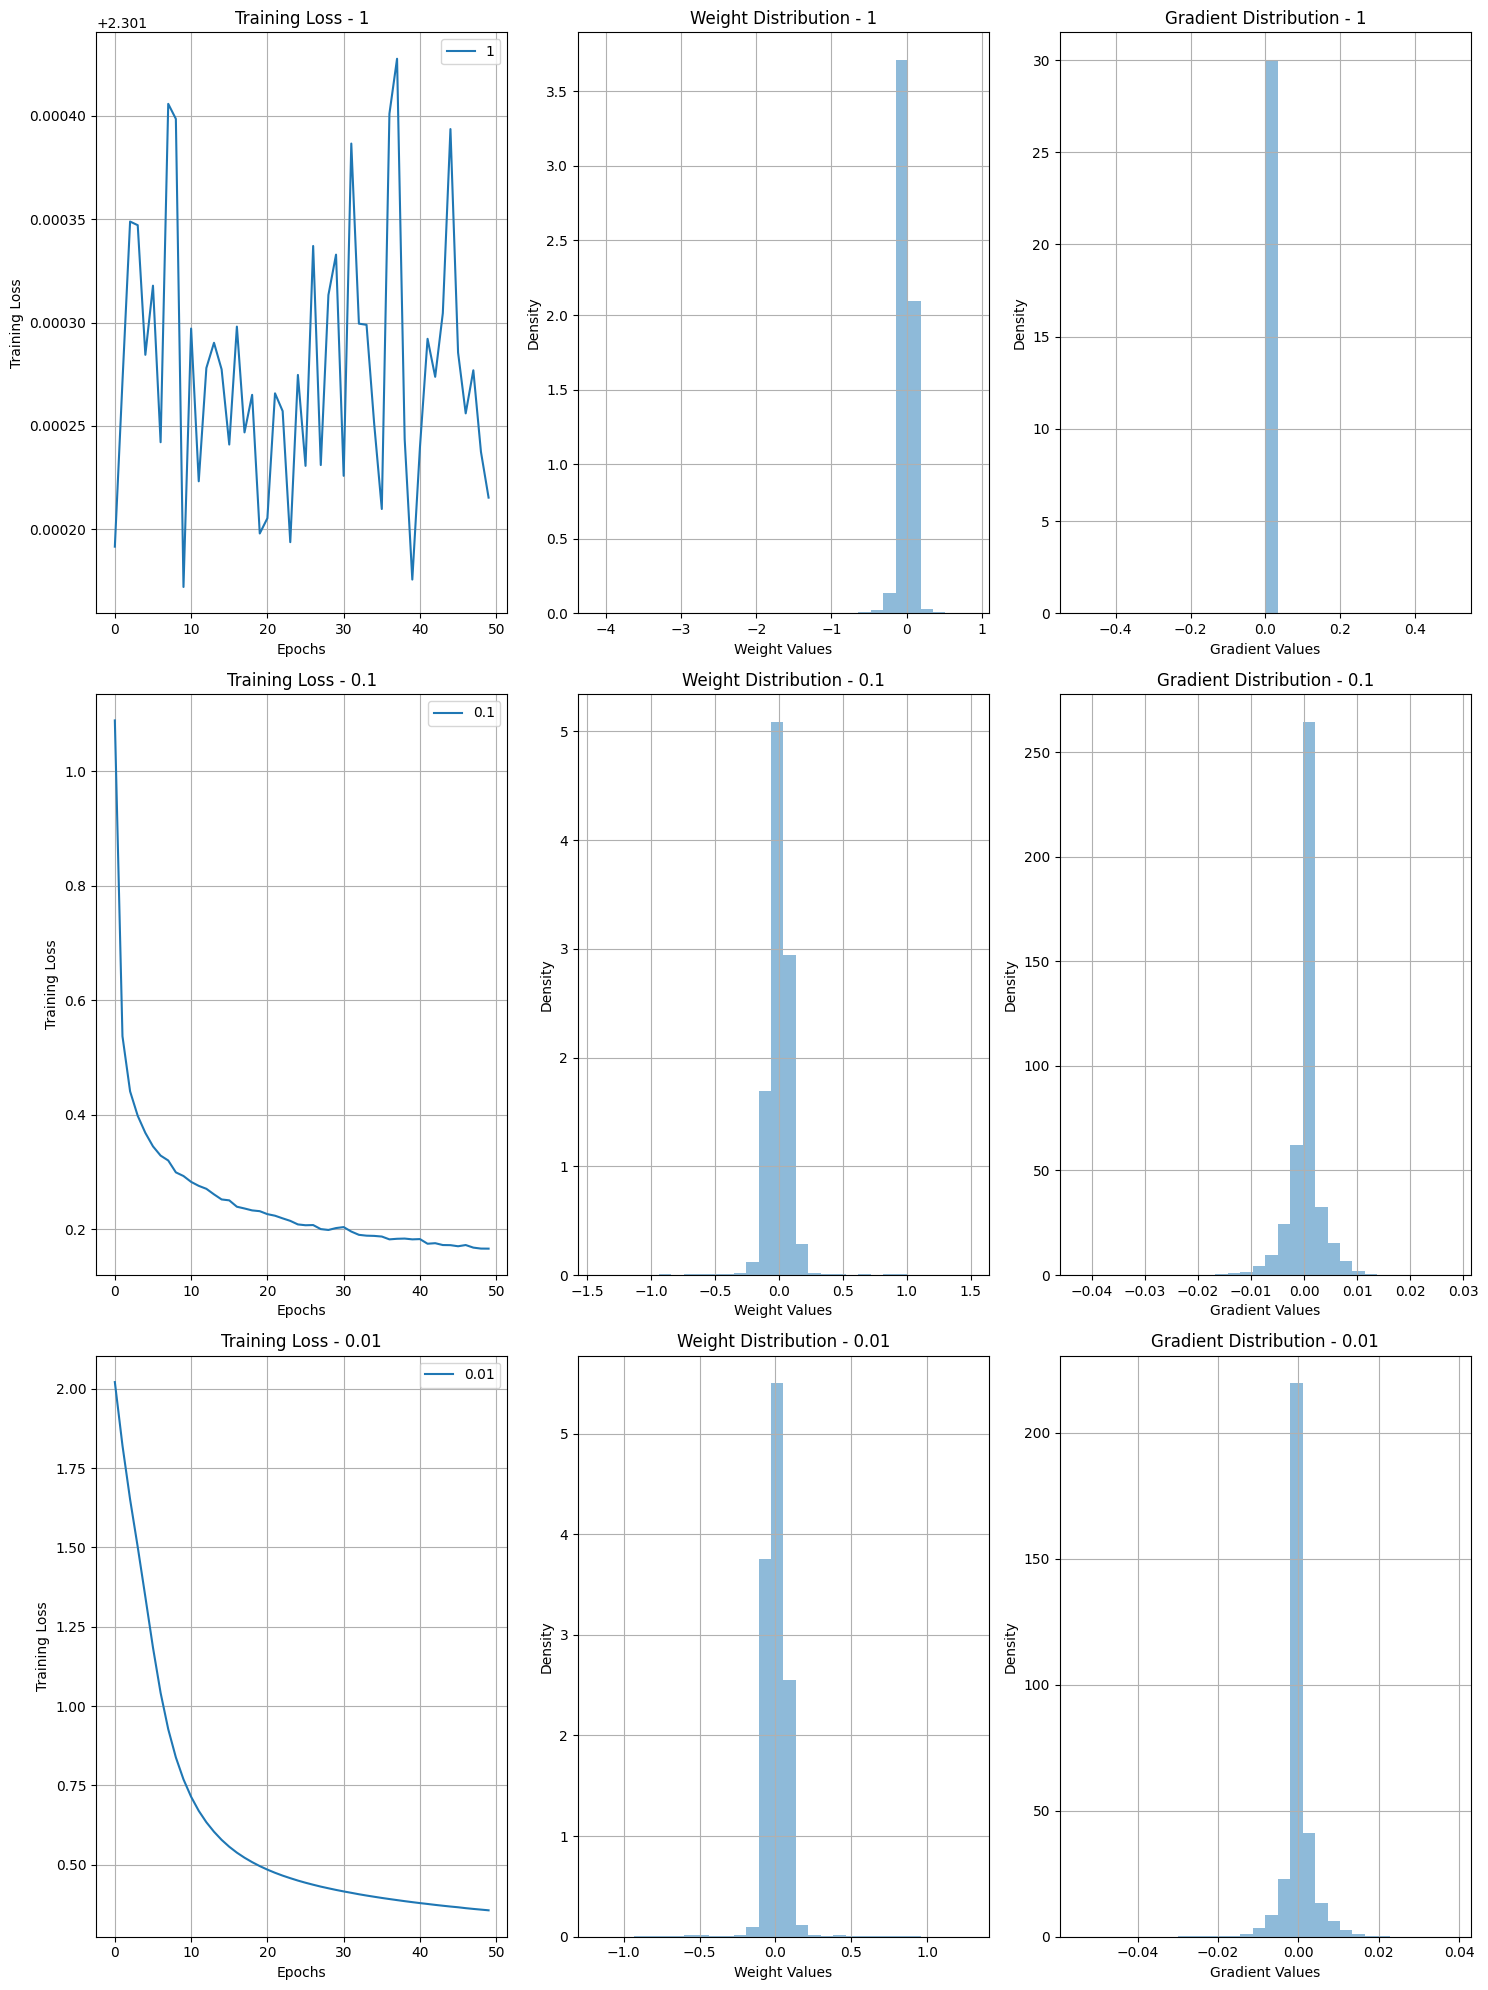

In [8]:
LR = [1,0.1,0.01]
results = {}

for a in LR:
    print(f"LR:  {a}")

    hidden_layer_1 = Layer(input_size=784, n_neurons=16, activation='relu', bias_init='zeros', seed=42, weight_init='he_uniform')
    hidden_layer_2 = Layer(input_size=16, n_neurons=8, activation='relu', bias_init='zeros', seed=42, weight_init='he_uniform')
    output_layer = Layer(input_size=8, n_neurons=10, activation='softmax', bias_init='zeros', seed=42, weight_init='he_uniform')
    layers = [hidden_layer_1, hidden_layer_2, output_layer]
    mlp = MLP(layers=layers, loss_function='cce', lr=a, verbose=1)
    mlp.train(X_train, y_train, X_val=X_test, y_val=y_test, epochs=50, batch_size=1000)
    test_acc = mlp.accuracy(X_test, y_test)
    print(f"Test Accuracy ({a}): {test_acc:.2f}%")

    results[a] = {
        "loss_graph": mlp.loss_graph,
        "valid_graph": mlp.valid_graph,
        "weights_history": mlp.weights_history,
        "gradients_history": mlp.gradients_history
    }


def plot_comparison(results):
    fig, axes = plt.subplots(3, 3, figsize=(15, 20))
    
    for i, (activation, res) in enumerate(results.items()):
        ax = axes[i, 0]
        ax.plot(res["loss_graph"], label=f"{activation}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Training Loss")
        ax.set_title(f"Training Loss - {activation}")
        ax.legend()
        ax.grid(True)
        
        ax = axes[i, 1]
        weights = np.concatenate([np.ravel(w[-1]) for w in res["weights_history"].values()])
        ax.hist(weights, bins=30, alpha=0.5, density=True)
        ax.set_xlabel("Weight Values")
        ax.set_ylabel("Density")
        ax.set_title(f"Weight Distribution - {activation}")
        ax.grid(True)
        
        ax = axes[i, 2]
        grads = np.concatenate([np.ravel(g[-1]) for g in res["gradients_history"].values()])
        ax.hist(grads, bins=30, alpha=0.5, density=True)
        ax.set_xlabel("Gradient Values")
        ax.set_ylabel("Density")
        ax.set_title(f"Gradient Distribution - {activation}")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_comparison(results)
